# Explore here

Paso 1: Carga del conjunto de datos

In [30]:
import pandas as pd

# your code here

total_data = pd.read_csv("/workspace/med-insurance-lr-model/data/raw/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Paso 2: Realiza un EDA completo

In [31]:
#Extraer informacion de las variables

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
#Eliminar duplicados

total_data = total_data.drop_duplicates()
total_data.shape

(1337, 7)

In [33]:
#Eliminar información irrelevante, al querer calcularse en base a datos fisiologicos, la región no es relevante.

total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


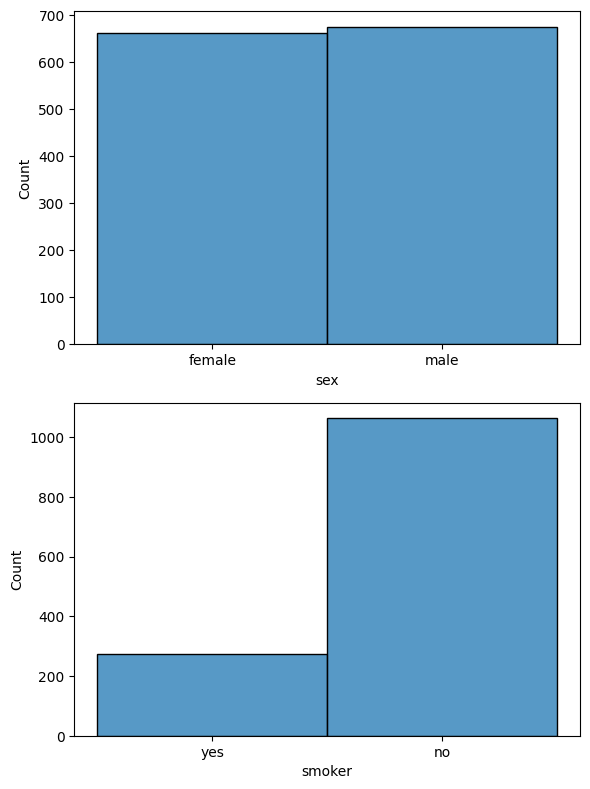

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns


# Analisis de variables categóricas


fig, axis = plt.subplots(2, 1 , figsize = (6, 8))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "sex")
sns.histplot(ax = axis[1], data = total_data, x = "smoker")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = gro

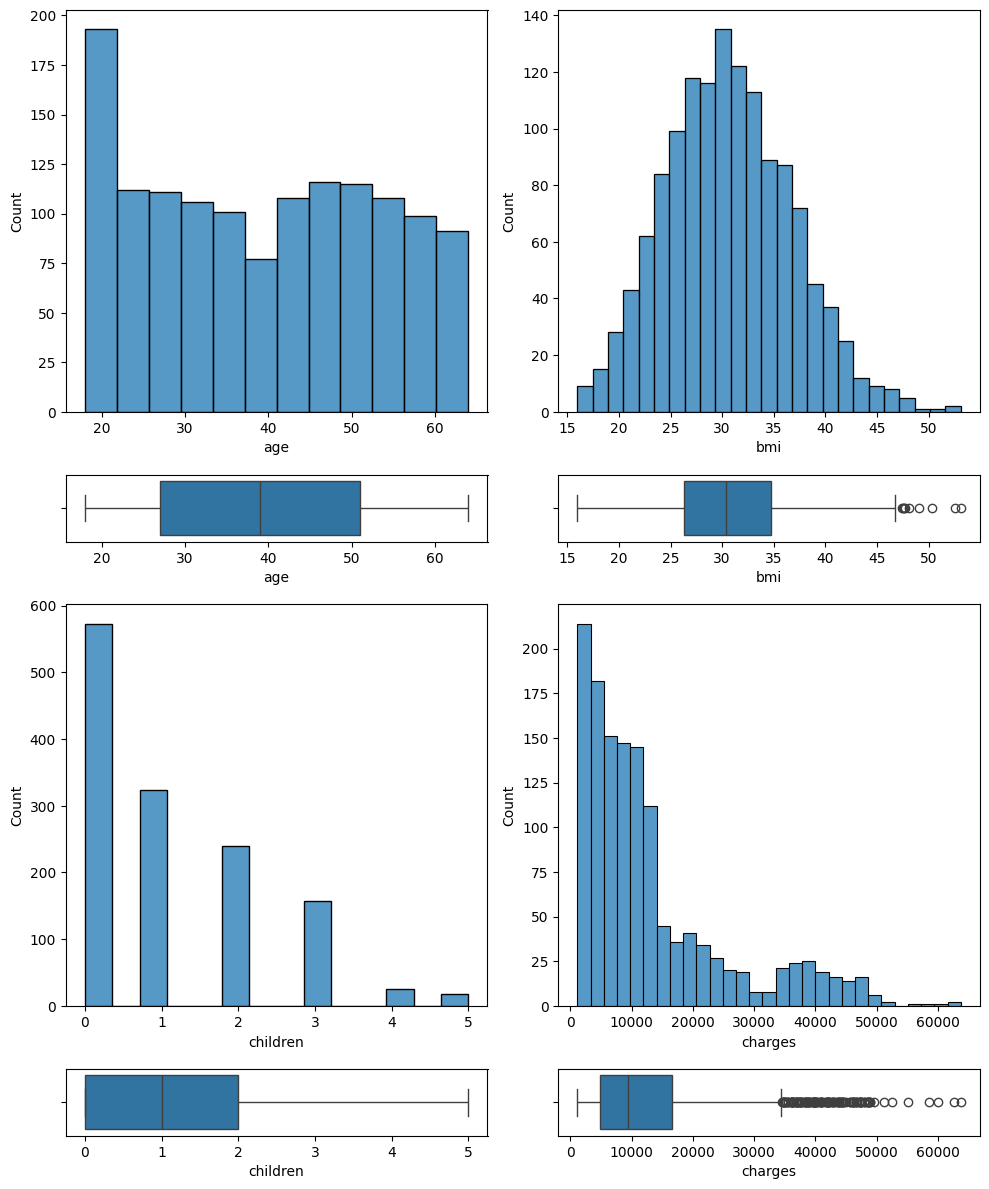

In [35]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")

sns.histplot(ax = axis[2, 1], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

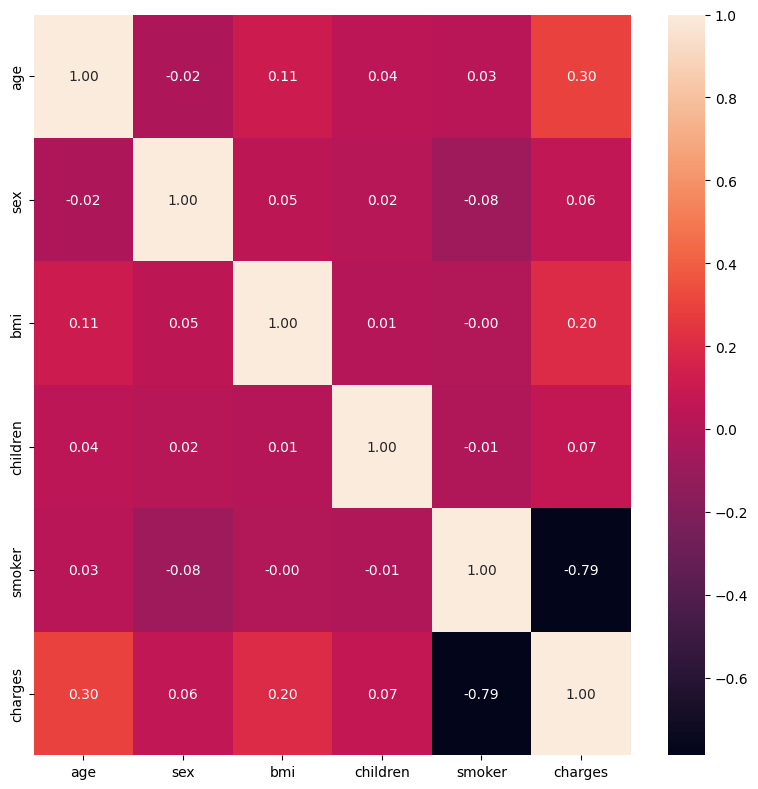

In [36]:
# Factorizar las variables categoricas.
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]

fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker", "charges"]].corr(), annot = True, fmt = ".2f")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

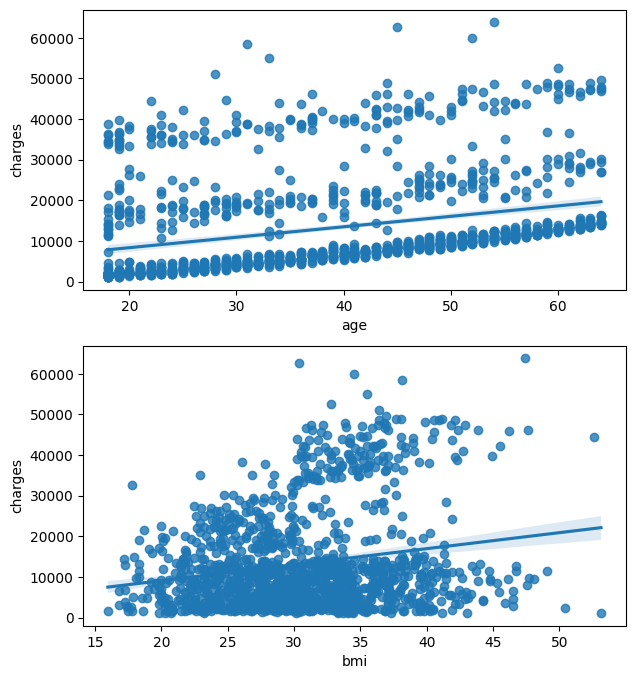

In [37]:
#Analizar correlaciones

fig, axis = plt.subplots(2,1, figsize = (7, 8))

sns.regplot(ax = axis[0], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[1], data = total_data, x = "bmi", y = "charges")


plt.show()

In [38]:
#Visualizar datos

total_data.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = gro

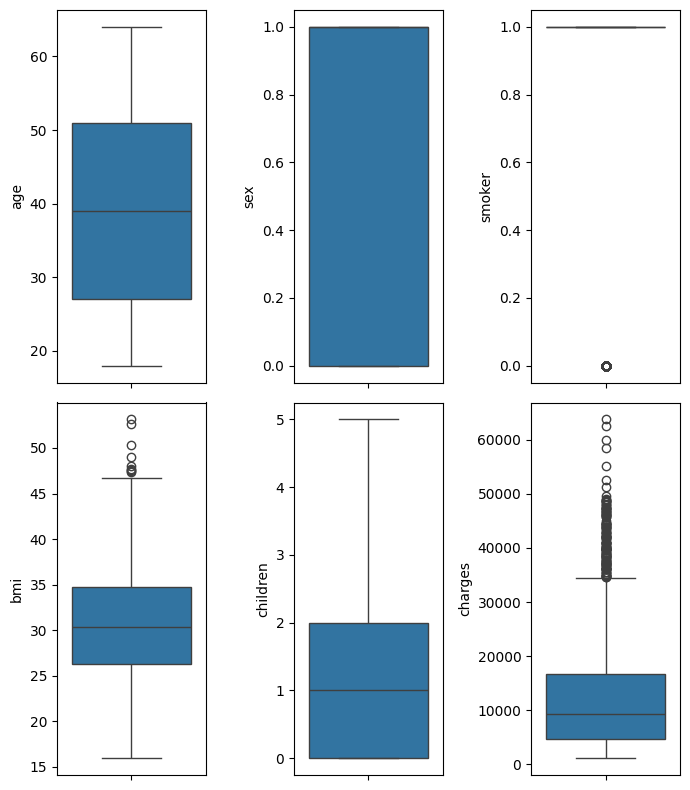

In [39]:
#Dibujar diagramas de cajas

fig, axis = plt.subplots(2, 3, figsize = (7, 8))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "sex")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "children")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "smoker")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "charges")


plt.tight_layout()

plt.show()

In [40]:
#Analisis de nulos

total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "sex", "bmi", "children", "smoker"]

X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker
1114,23,1,24.510,0,1
968,21,1,25.745,2,1
599,52,0,37.525,2,1
170,63,1,41.470,0,1
275,47,0,26.600,2,1


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,sex,bmi,children,smoker
1114,0.108696,1.0,0.230024,0.0,1.0
968,0.065217,1.0,0.263250,0.4,1.0
599,0.739130,0.0,0.580172,0.4,1.0
170,0.978261,1.0,0.686306,0.0,1.0
275,0.630435,0.0,0.286252,0.4,1.0


In [43]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,sex,bmi,children,smoker
0,23.0,1.0,24.510,0.0,1.0
1,21.0,1.0,25.745,2.0,1.0
2,52.0,0.0,37.525,2.0,1.0
3,63.0,1.0,41.470,0.0,1.0
4,47.0,0.0,26.600,2.0,1.0


In [44]:
X_test_sel.head()

,age,sex,bmi,children,smoker
0,49.0,1.0,22.515,0.0,1.0
1,29.0,0.0,25.600,4.0,1.0
2,51.0,0.0,36.385,3.0,1.0
3,31.0,1.0,34.390,3.0,0.0
4,31.0,1.0,38.390,2.0,1.0


In [45]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

In [46]:
X_train_sel.to_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_train.csv", index=False)
X_test_sel.to_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_test.csv", index=False)

Paso 3: Construye un modelo de regresión lineal

In [47]:
train_data = pd.read_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_train.csv")
test_data = pd.read_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_test.csv")

train_data.head()

,age,sex,bmi,children,smoker,charges
0,23.0,1.0,24.510,0.0,1.0,2396.09590
1,21.0,1.0,25.745,2.0,1.0,3279.86855
2,52.0,0.0,37.525,2.0,1.0,33471.97189
3,63.0,1.0,41.470,0.0,1.0,13405.39030
4,47.0,0.0,26.600,2.0,1.0,9715.84100


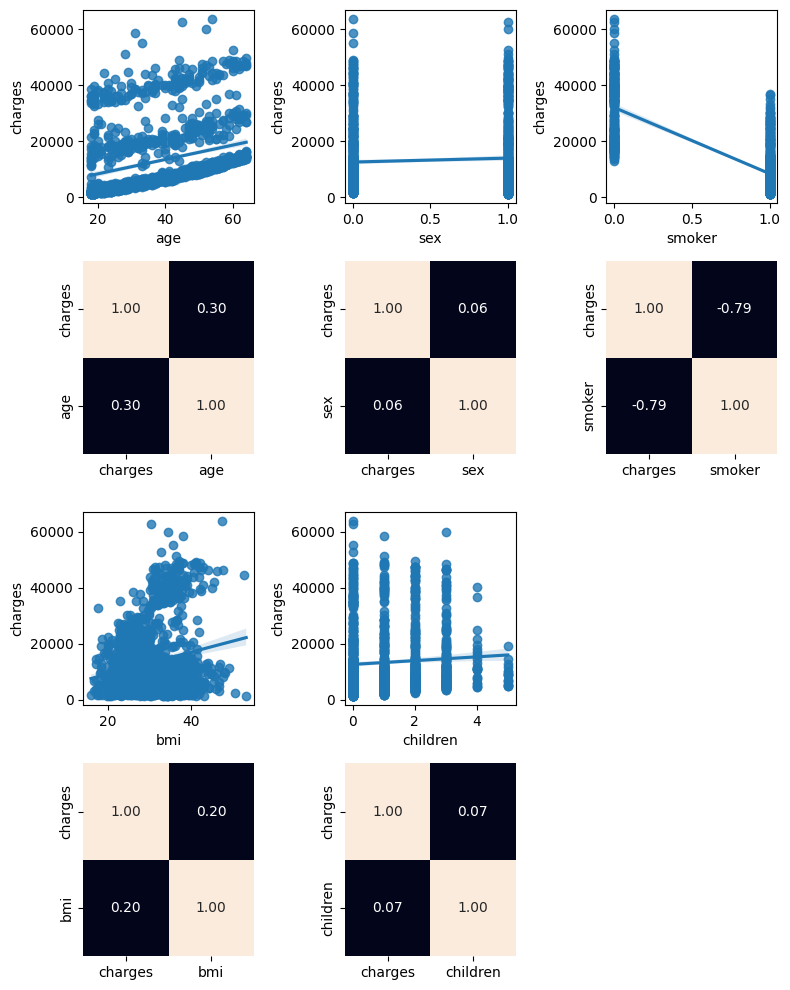

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize = (8, 10))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "sex", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[0, 2])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()